<a href="https://colab.research.google.com/github/MudassirABBASSi/Deep-Learning-/blob/main/Data_Agumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt


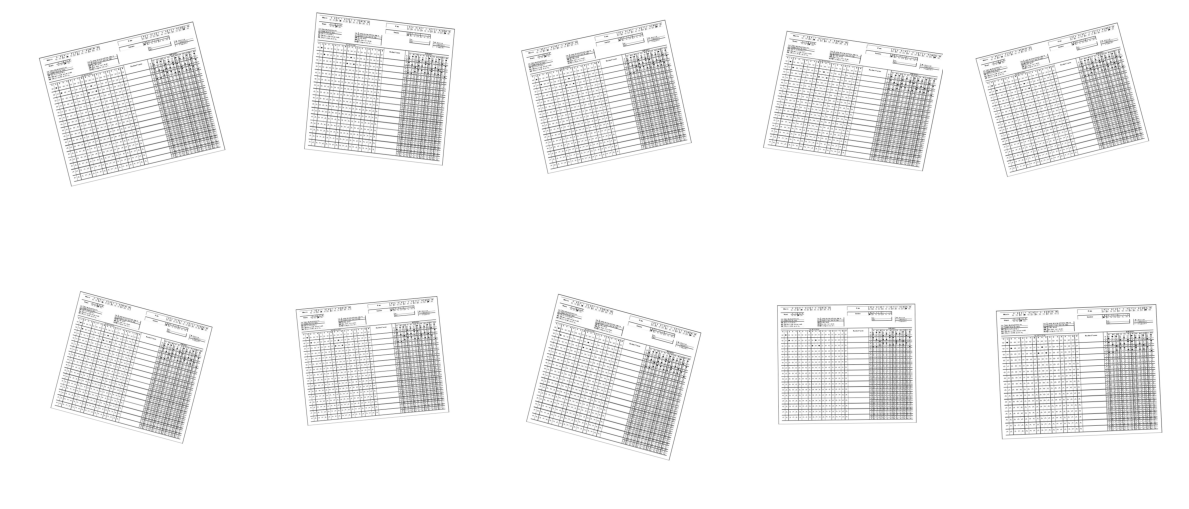

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Read the original image
img_path = "page_1.jpg"  # Update with your path
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. Pad the image (add white border around it)
top, bottom, left, right = (100, 100, 100, 100)
white_color = [255, 255, 255]  # fill with white
padded_img = cv2.copyMakeBorder(
    img, top, bottom, left, right,
    cv2.BORDER_CONSTANT, value=white_color
)

# 3. Resize or keep as is (optional)
padded_img = cv2.resize(padded_img, (600, 600))

# 4. Create the ImageDataGenerator with mild transformations
datagen = ImageDataGenerator(
    rotation_range=15,       # small to moderate rotation
    width_shift_range=0.05,  # small horizontal shift
    height_shift_range=0.05, # small vertical shift
    shear_range=0.0,         # avoid shear to prevent text distortion
    zoom_range=0.1,          # slight zoom
    horizontal_flip=False,   # typically false for forms
    fill_mode='constant',    # fill with constant color
    cval=255                 # white fill
)

# 5. Prepare the image batch
img_array = np.expand_dims(padded_img, axis=0)

# 6. Create an iterator for augmentation
augment_iterator = datagen.flow(img_array, batch_size=1)

# 7. Display some augmented images
plt.figure(figsize=(12, 6))
for i in range(10):
    batch = next(augment_iterator)
    aug_img = batch[0].astype('uint8')
    plt.subplot(2, 5, i+1)
    plt.imshow(aug_img)
    plt.axis("off")

plt.tight_layout()
plt.show()


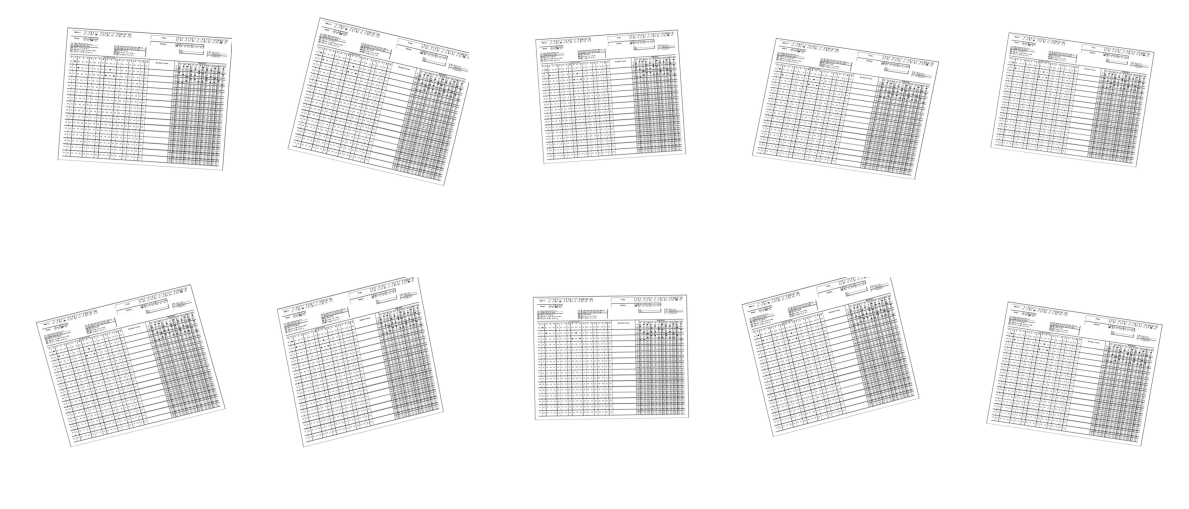

In [ ]:
# prompt: store the images in the folder dir

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Create the directory if it doesn't exist
output_dir = "augmented_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

img_path = "page_1.jpg"  # Update with your path
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

top, bottom, left, right = (100, 100, 100, 100)
white_color = [255, 255, 255]
padded_img = cv2.copyMakeBorder(
    img, top, bottom, left, right,
    cv2.BORDER_CONSTANT, value=white_color
)

padded_img = cv2.resize(padded_img, (600, 600))

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.0,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='constant',
    cval=255
)

img_array = np.expand_dims(padded_img, axis=0)
augment_iterator = datagen.flow(img_array, batch_size=1)

plt.figure(figsize=(12, 6))
for i in range(10):
    batch = next(augment_iterator)
    aug_img = batch[0].astype('uint8')

    # Save the augmented image to the directory
    image_filename = os.path.join(output_dir, f"augmented_image_{i}.jpg")
    cv2.imwrite(image_filename, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)) # Correct color conversion for saving

    plt.subplot(2, 5, i+1)
    plt.imshow(aug_img)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# prompt: save these images

import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ... (Your existing code for image loading, padding, resizing, and datagen setup)


# Create the directory if it doesn't exist
output_dir = "augmented_images0"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# ... (Your existing code for image augmentation loop)

for i in range(10):
    batch = next(augment_iterator)
    aug_img = batch[0].astype('uint8')

    # Save the augmented image to the directory
    image_filename = os.path.join(output_dir, f"augmented_image_{i}.jpg")
    cv2.imwrite(image_filename, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)) # Correct color conversion for saving

# ... (rest of your existing code)
